# Loan Approval Prediction
## Alfido Tech Internship – Task 2
### Intern: Mohammed Maahin | Candidate ID: BS/REG/106534
This project involves performing EDA and building a predictive ML model on a Loan dataset. The target variable is `Loan_Status`, which indicates loan approval (Y/N).

## IMPORTING LIBRARIES

In [1]:
%pip install seaborn

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


## LOADING DATASET

In [3]:
df = pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## DATA CLEANING AND EDA

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 48.0+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isna().sum()*100/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

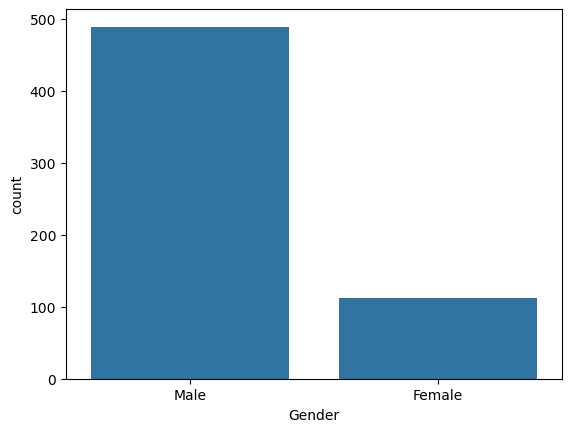

In [8]:
sns.countplot(x = df['Gender'])

In [9]:
df['Gender'].mode()[0]

'Male'

In [10]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

<Axes: xlabel='Married', ylabel='count'>

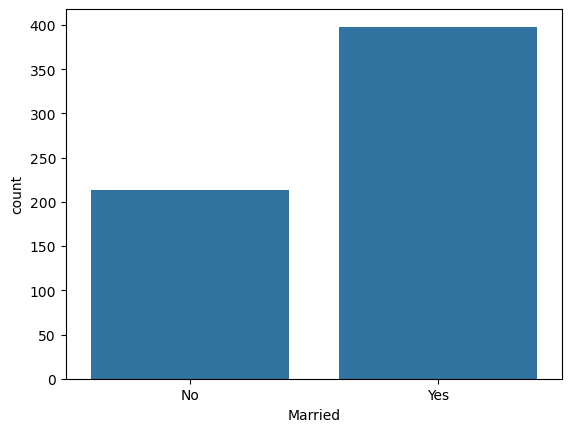

In [11]:
sns.countplot(x= df['Married'])

In [12]:
df['Married'].mode()[0]

'Yes'

In [13]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

<Axes: xlabel='Dependents', ylabel='count'>

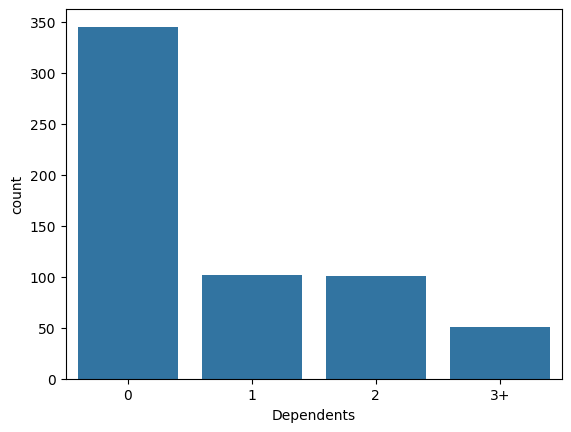

In [14]:
sns.countplot(x=df['Dependents'])

In [15]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [16]:
df['Dependents'].mode()[0]

'0'

In [17]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

<Axes: xlabel='Self_Employed', ylabel='count'>

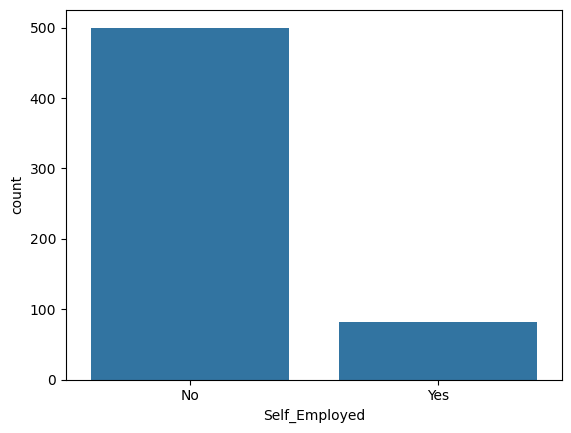

In [18]:
sns.countplot(x = df['Self_Employed'])

In [19]:
df['Self_Employed'].mode()[0]

'No'

In [20]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [21]:
df.isna().sum()*100/len(df)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [22]:
df['LoanAmount'].median()

np.float64(128.0)

In [23]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [24]:
df['Loan_Amount_Term'].median()

np.float64(360.0)

In [25]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

<Axes: xlabel='Credit_History', ylabel='count'>

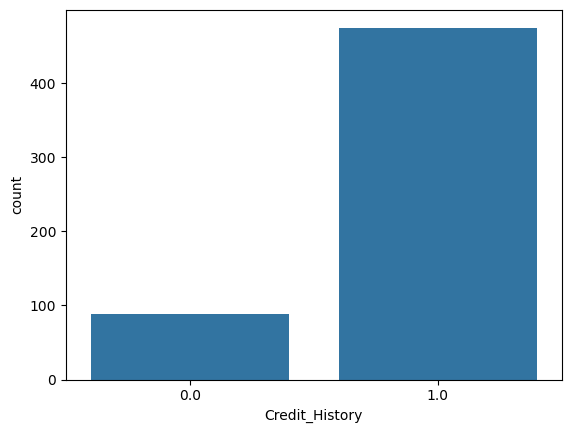

In [26]:
sns.countplot(x = df['Credit_History'])

In [27]:
df['Credit_History'].mode()[0]

np.float64(1.0)

In [28]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [29]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Encode Categorical Variables

In [31]:
df.replace({
    "Loan_Status": {'N': 0, 'Y': 1},
    "Gender": {'Male': 0, 'Female': 1},
    "Education": {'Not Graduate': 0, 'Graduate': 1},
    "Married": {'No': 0, 'Yes': 1},
    "Self_Employed": {'No': 0, 'Yes': 1}
}, inplace=True)

In [32]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0,1,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1


## Train/Test Split & Feature Engineering

In [33]:
def train_test_split_and_features(df):
    y = df["Loan_Status"]
    x = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
    x = pd.get_dummies(data = x, columns = ["Property_Area","Dependents"])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    print(x.head(5))
    print(x.columns)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test,features

In [34]:
x_train, x_test, y_train, y_test,features = train_test_split_and_features(df)

   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       0        0          1              0             5849   
1       0        1          1              0             4583   
2       0        1          1              1             3000   
3       0        1          0              0             2583   
4       0        0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  \
0                False                    False                 True   
1                 True                    Fa

## Model Training & Evaluation

In [35]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test):
    random_forest =  RandomForestClassifier(random_state=0,\
                                            max_depth=5,\
                                            min_samples_split= 0.01,\
                                            max_features= 0.8,
                                            max_samples= 0.8)

    model = random_forest.fit(x_train, y_train)
    random_forest_predict = random_forest.predict(x_test)
    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)
    print("confussion matrix")
    print(random_forest_conf_matrix)
    print("\n")
    print("Accuracy of Random Forest:",random_forest_acc_score*100,'\n')
    print(classification_report(y_test,random_forest_predict))
    return model

In [36]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test)

confussion matrix
[[14 19]
 [ 3 87]]


Accuracy of Random Forest: 82.11382113821138 

              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

    accuracy                           0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123



## FEATURE IMPORTANCE

In [37]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)

<BarContainer object of 16 artists>

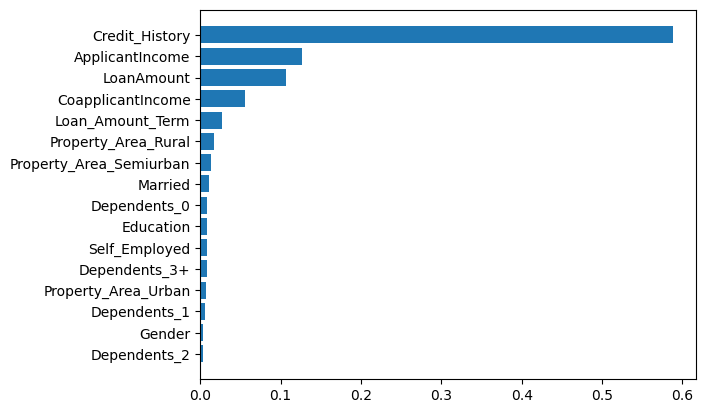

In [38]:
import matplotlib.pyplot as plt
plt.barh(importances.feature, importances.importance)

In [39]:
rf_proba = model.predict_proba(x_test)
rf_predict = model.predict(x_test)
print(rf_proba[0:10])
print(rf_predict)

[[0.19444599 0.80555401]
 [0.14819569 0.85180431]
 [0.38052013 0.61947987]
 [0.1841529  0.8158471 ]
 [0.08591748 0.91408252]
 [0.75808333 0.24191667]
 [0.2238848  0.7761152 ]
 [0.32124327 0.67875673]
 [0.88275661 0.11724339]
 [0.12933904 0.87066096]]
[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [40]:
features = x_train.columns.tolist()
print(features)

['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+']


## Custom Sample Input Predictions

In [41]:
sample_input_df = pd.DataFrame([{
    'Gender': 0,                
    'Married': 1,               
    'Education': 1,             
    'Self_Employed': 0,         
    'ApplicantIncome': 5000,    
    'CoapplicantIncome': 2000,  
    'LoanAmount': 150.0,
    'Loan_Amount_Term': 360.0,
    'Credit_History': 1.0,      
    'Property_Area_Rural': 0,
    'Property_Area_Semiurban': 1,  
    'Property_Area_Urban': 0,
    'Dependents_0': 1,          
    'Dependents_1': 0,
    'Dependents_2': 0,
    'Dependents_3+': 0
}])

In [42]:
sample_prediction = model.predict(sample_input_df)
sample_probability = model.predict_proba(sample_input_df)

print("Prediction:", "Loan Approved" if sample_prediction[0] == 1 else "Loan Rejected")
print("Probability of Approval:", round(sample_probability[0][1]*100, 2), "%")

Prediction: Loan Approved
Probability of Approval: 80.69 %


In [43]:
sample_1 = pd.DataFrame([{
    'Gender': 0,  # Male
    'Married': 1,
    'Education': 1,  # Graduate
    'Self_Employed': 0,
    'ApplicantIncome': 8000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360.0,
    'Credit_History': 1.0,
    'Property_Area_Rural': 0,
    'Property_Area_Semiurban': 1,
    'Property_Area_Urban': 0,
    'Dependents_0': 1,
    'Dependents_1': 0,
    'Dependents_2': 0,
    'Dependents_3+': 0
}])


In [44]:
sample_prediction = model.predict(sample_1)
sample_probability = model.predict_proba(sample_1)

print("Prediction:", "Loan Approved" if sample_prediction[0] == 1 else "Loan Rejected ")
print("Probability of Approval:", round(sample_probability[0][1]*100, 2), "%")

Prediction: Loan Approved
Probability of Approval: 81.91 %


In [45]:
sample_2 = pd.DataFrame([{
    'Gender': 1,  # Female
    'Married': 0,
    'Education': 0,  # Not Graduate
    'Self_Employed': 1,
    'ApplicantIncome': 1800,
    'CoapplicantIncome': 0,
    'LoanAmount': 120,
    'Loan_Amount_Term': 360.0,
    'Credit_History': 0.0,
    'Property_Area_Rural': 1,
    'Property_Area_Semiurban': 0,
    'Property_Area_Urban': 0,
    'Dependents_0': 0,
    'Dependents_1': 0,
    'Dependents_2': 0,
    'Dependents_3+': 1
}])

In [46]:
sample_prediction = model.predict(sample_2)
sample_probability = model.predict_proba(sample_2)

print("Prediction:", "Loan Approved" if sample_prediction[0] == 1 else "Loan Rejected")
print("Probability of Approval:", round(sample_probability[0][1]*100, 2), "%")

Prediction: Loan Rejected
Probability of Approval: 8.71 %


In [47]:
sample_3 = pd.DataFrame([{
    'Gender': 0,
    'Married': 1,
    'Education': 1,
    'Self_Employed': 1,
    'ApplicantIncome': 3500,
    'CoapplicantIncome': 1500,
    'LoanAmount': 160,
    'Loan_Amount_Term': 360.0,
    'Credit_History': 1.0,
    'Property_Area_Rural': 0,
    'Property_Area_Semiurban': 0,
    'Property_Area_Urban': 1,
    'Dependents_0': 0,
    'Dependents_1': 1,
    'Dependents_2': 0,
    'Dependents_3+': 0
}])

In [48]:
sample_prediction = model.predict(sample_3)
sample_probability = model.predict_proba(sample_3)

print("Prediction:", "Loan Approved" if sample_prediction[0] == 1 else "Loan Rejected")
print("Probability of Approval:", round(sample_probability[0][1]*100, 2), "%")

Prediction: Loan Approved
Probability of Approval: 79.24 %


In [49]:
sample_4 = pd.DataFrame([{
    'Gender': 1,
    'Married': 1,
    'Education': 1,
    'Self_Employed': 0,
    'ApplicantIncome': 2500,
    'CoapplicantIncome': 1000,
    'LoanAmount': 300,
    'Loan_Amount_Term': 180.0,
    'Credit_History': 0.0,
    'Property_Area_Rural': 0,
    'Property_Area_Semiurban': 0,
    'Property_Area_Urban': 1,
    'Dependents_0': 0,
    'Dependents_1': 0,
    'Dependents_2': 1,
    'Dependents_3+': 0
}])

In [50]:
sample_prediction = model.predict(sample_4)
sample_probability = model.predict_proba(sample_4)

print("Prediction:", "Loan Approved" if sample_prediction[0] == 1 else "Loan Rejected")
print("Probability of Approval:", round(sample_probability[0][1]*100, 2), "%")

Prediction: Loan Rejected
Probability of Approval: 18.48 %


In [51]:
sample_5 = pd.DataFrame([{
    'Gender': 0,
    'Married': 1,
    'Education': 1,
    'Self_Employed': 0,
    'ApplicantIncome': 7000,
    'CoapplicantIncome': 3000,
    'LoanAmount': 180,
    'Loan_Amount_Term': 360.0,
    'Credit_History': 1.0,
    'Property_Area_Rural': 0,
    'Property_Area_Semiurban': 1,
    'Property_Area_Urban': 0,
    'Dependents_0': 0,
    'Dependents_1': 1,
    'Dependents_2': 0,
    'Dependents_3+': 0
}])

In [52]:
sample_prediction = model.predict(sample_5)
sample_probability = model.predict_proba(sample_5)

print("Prediction:", "Loan Approved" if sample_prediction[0] == 1 else "Loan Rejected")
print("Probability of Approval:", round(sample_probability[0][1]*100, 2), "%")

Prediction: Loan Approved
Probability of Approval: 79.61 %
